# Project Planning Stage (Individual)


### Players Dataset
Includes 196 observations with six variables:

- *experience* (Type: Character) can be Beginner, Amateur, Regular, Veteran, and Pro.
- *subscribe* (Type: Logical) can be True (subscribed) or False (not subscribed).
- *hashedEmail* (Type: Character) is hashed for privacy.
- *played_hours* (Type: Double) shows the total hours played. Summary Statistics are:
    - Maximum: 233.1
    - Minimum: 0
    
- *gender* (Type: Character) can be "Male", "Female", "Non-binary", etc.
  
- *Age* (Type: Integer) is a player's age. Summary Statistics are (no N/A values included):
    - Maximum: 50
    - Minimum: 8
  
Issues include inconsistencies in experience vs. playtime and missing age/gender data.

The way this data was collected is likely through the game's player profiles or the game's sign-up system,  indicated by a player's name being "ThÃ©o".

### Sessions Dataset

Includes 1535 observations with five variables:

- *hashedEmail* (Type: Character) is hashed for privacy.
- *start_time* (Type: Date) is the date the player started playing the game in DD/MM/YYYY, and time in 24hr format.
- *end_time* (Type: Date) is the same as start_time, except when the player finished playing.
- *original_start_time* (Type: Double) is the same as start_time, but UNIX.
- *original_end_time* (Type: Double) is the same as end_time, but UNIX.

## Questions:

The broad question chosen was Question 1.

My predictive question: "Can experience level, session frequency, and total hours played predict newsletter subscription?"
- Response variable: *subscription* in the Players dataset.
- Predictors: *experience* (categorical), *original_start_time* (numeric), *original_end_time* (numeric), *played_hours* (numeric).


The Players dataset provides player characteristics, including subscription status and total hours played. The Sessions dataset helps determine session frequency, which may correlate with subscription. 

Before analysis, missing values (especially in played_hours) will be handled, and subscribe will be converted to a categorical variable.

## Exploratory Data Analysis and Visualization:

### Reading and Wrangling Players and Session Datasets

In [1]:
# Loading Library
library(tidyverse)
library(RColorBrewer)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
# Reading Players and Sessions Data

url_player <- "https://drive.google.com/uc?id=1pD2UbBtMG1NHjlCo4HYVrvy72jilNUv-"
download.file(url_player, destfile = "players.csv")
players <- read_csv("players.csv")

players <- players |>
    mutate(Age = as.integer(Age))


head(players)

url_session <- "https://drive.google.com/uc?id=1hxxAsbbkLq_HsMXA8oUWhAOURCA62Uvx"
download.file(url_session, destfile = "sessions.csv")
sessions <- read_csv("sessions.csv")

sessions <- sessions |>
    mutate(start_time = as_datetime(start_time), end_time = as_datetime(end_time))

head(sessions)


Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<int>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<dttm>,<dttm>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,2030-06-21 00:18:12,2030-06-21 00:18:24,1.72e+12,1.72e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,2017-06-21 00:23:33,2017-06-21 00:23:46,1.72e+12,1.72e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,2025-07-21 00:17:34,2025-07-21 00:17:57,1.72e+12,1.72e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,2025-07-21 00:03:22,2025-07-21 00:03:58,1.72e+12,1.72e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,2025-05-21 00:16:01,2025-05-21 00:16:12,1.72e+12,1.72e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,2023-06-21 00:15:08,2023-06-21 00:17:10,1.72e+12,1.72e+12


### Summary Statistics of Players Dataset

In [3]:
# Summary Statistics for numerical variables (played_hours and age)
players_numerical_summary <- players |>
    summarize(
        mean_played_hours = mean(played_hours, na.rm = TRUE),
        max_played_hours = max(played_hours, na.rm = TRUE),
        min_played_hours = min(played_hours, na.rm = TRUE),
        mean_age = mean(Age, na.rm = TRUE),
        max_age = max(Age, na.rm = TRUE),
        min_age = min(Age, na.rm = TRUE)
    )

players_numerical_summary

mean_played_hours,max_played_hours,min_played_hours,mean_age,max_age,min_age
<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
5.845918,223.1,0,20.52062,50,8


In [4]:
# Summary Statistics for categorical variables (experience, subscribe, gender)
players_categorical_summary <- players |>
    group_by(experience, subscribe, gender) |>
    summarize(count = n())

players_categorical_summary

`summarise()` has grouped output by 'experience', 'subscribe'. You can override
using the `.groups` argument.


experience,subscribe,gender,count
<chr>,<lgl>,<chr>,<int>
Amateur,FALSE,Female,3
Amateur,FALSE,Male,10
Amateur,FALSE,Prefer not to say,3
Amateur,FALSE,Two-Spirited,2
Amateur,TRUE,Female,11
Amateur,TRUE,Male,30
Amateur,TRUE,Non-binary,1
Amateur,TRUE,Prefer not to say,1
Amateur,TRUE,Two-Spirited,2


### Visualizations

By comparing the distribution of total hours played among subscribed vs. non-subscribed players, this would help identify if those who subscribe play more or less compared to those who don’t.

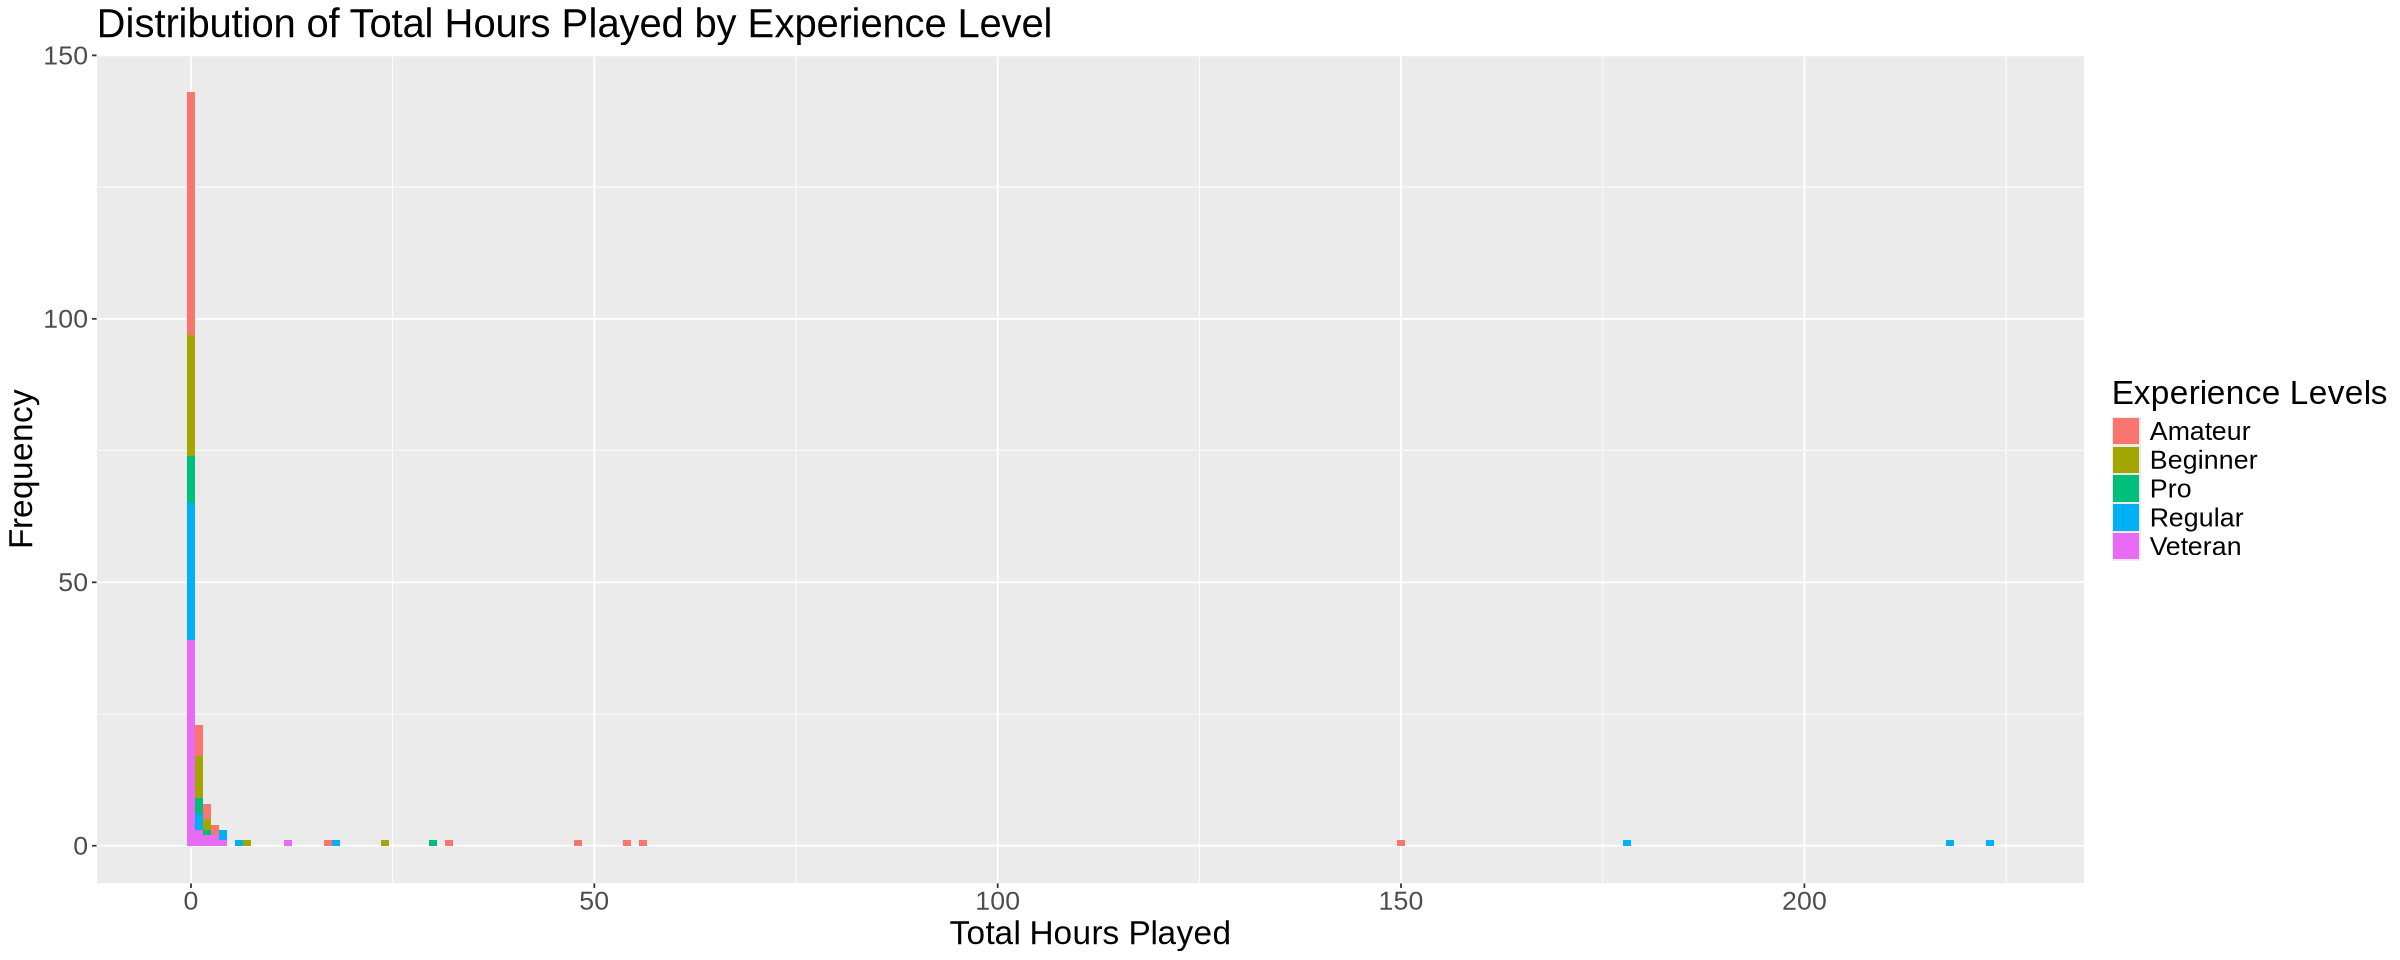

In [5]:
options(repr.plot.height = 8, repr.plot.width = 20)

ggplot(players, aes(x = played_hours, fill = experience)) +
    geom_histogram(binwidth = 1) +
    labs(title = "Distribution of Total Hours Played by Experience Level", 
         x = "Total Hours Played", y = "Frequency", 
         fill = "Experience Levels") +
    theme(text = element_text(size = 20))

By tracking session frequency over time, this can observe whether higher session frequency or more sessions over time could indicate more engaged players, and engaged players might be more likely to subscribe to a newsletter.

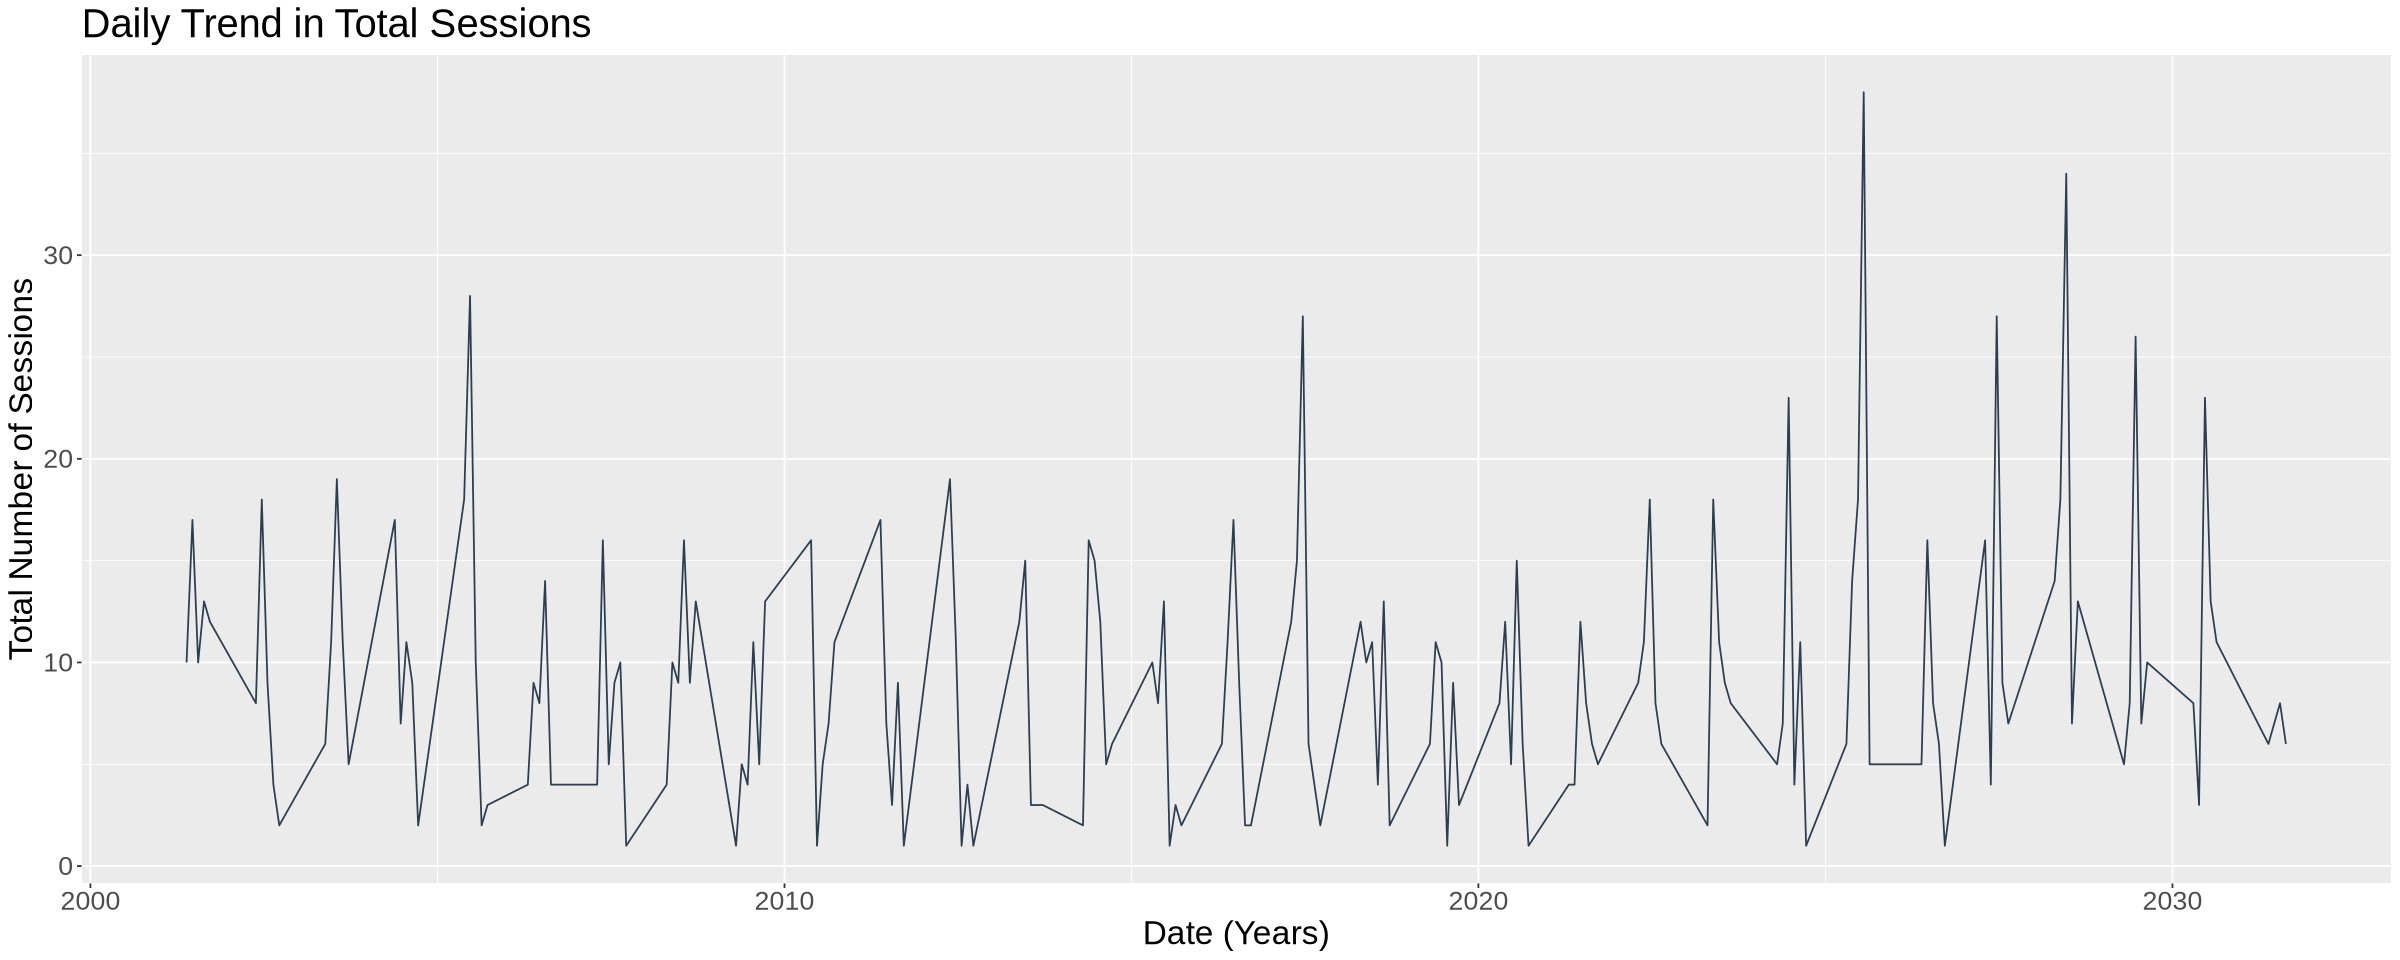

In [6]:
sessions2 <- sessions |>
  mutate(date = as.Date(start_time)) |>
  group_by(date) |>
  summarise(total_sessions = n()) 

ggplot(sessions2, aes(x = date, y = total_sessions)) +
  geom_line(color = "#2C3E50") + 
  labs(title = "Daily Trend in Total Sessions",
       x = "Date (Years)",
       y = "Total Number of Sessions") +
  theme(text = element_text(size = 20))


By visualizing the count of players who have subscribed to the newsletter across different experience levels, it can help identify whether more experienced players are more likely to subscribe.


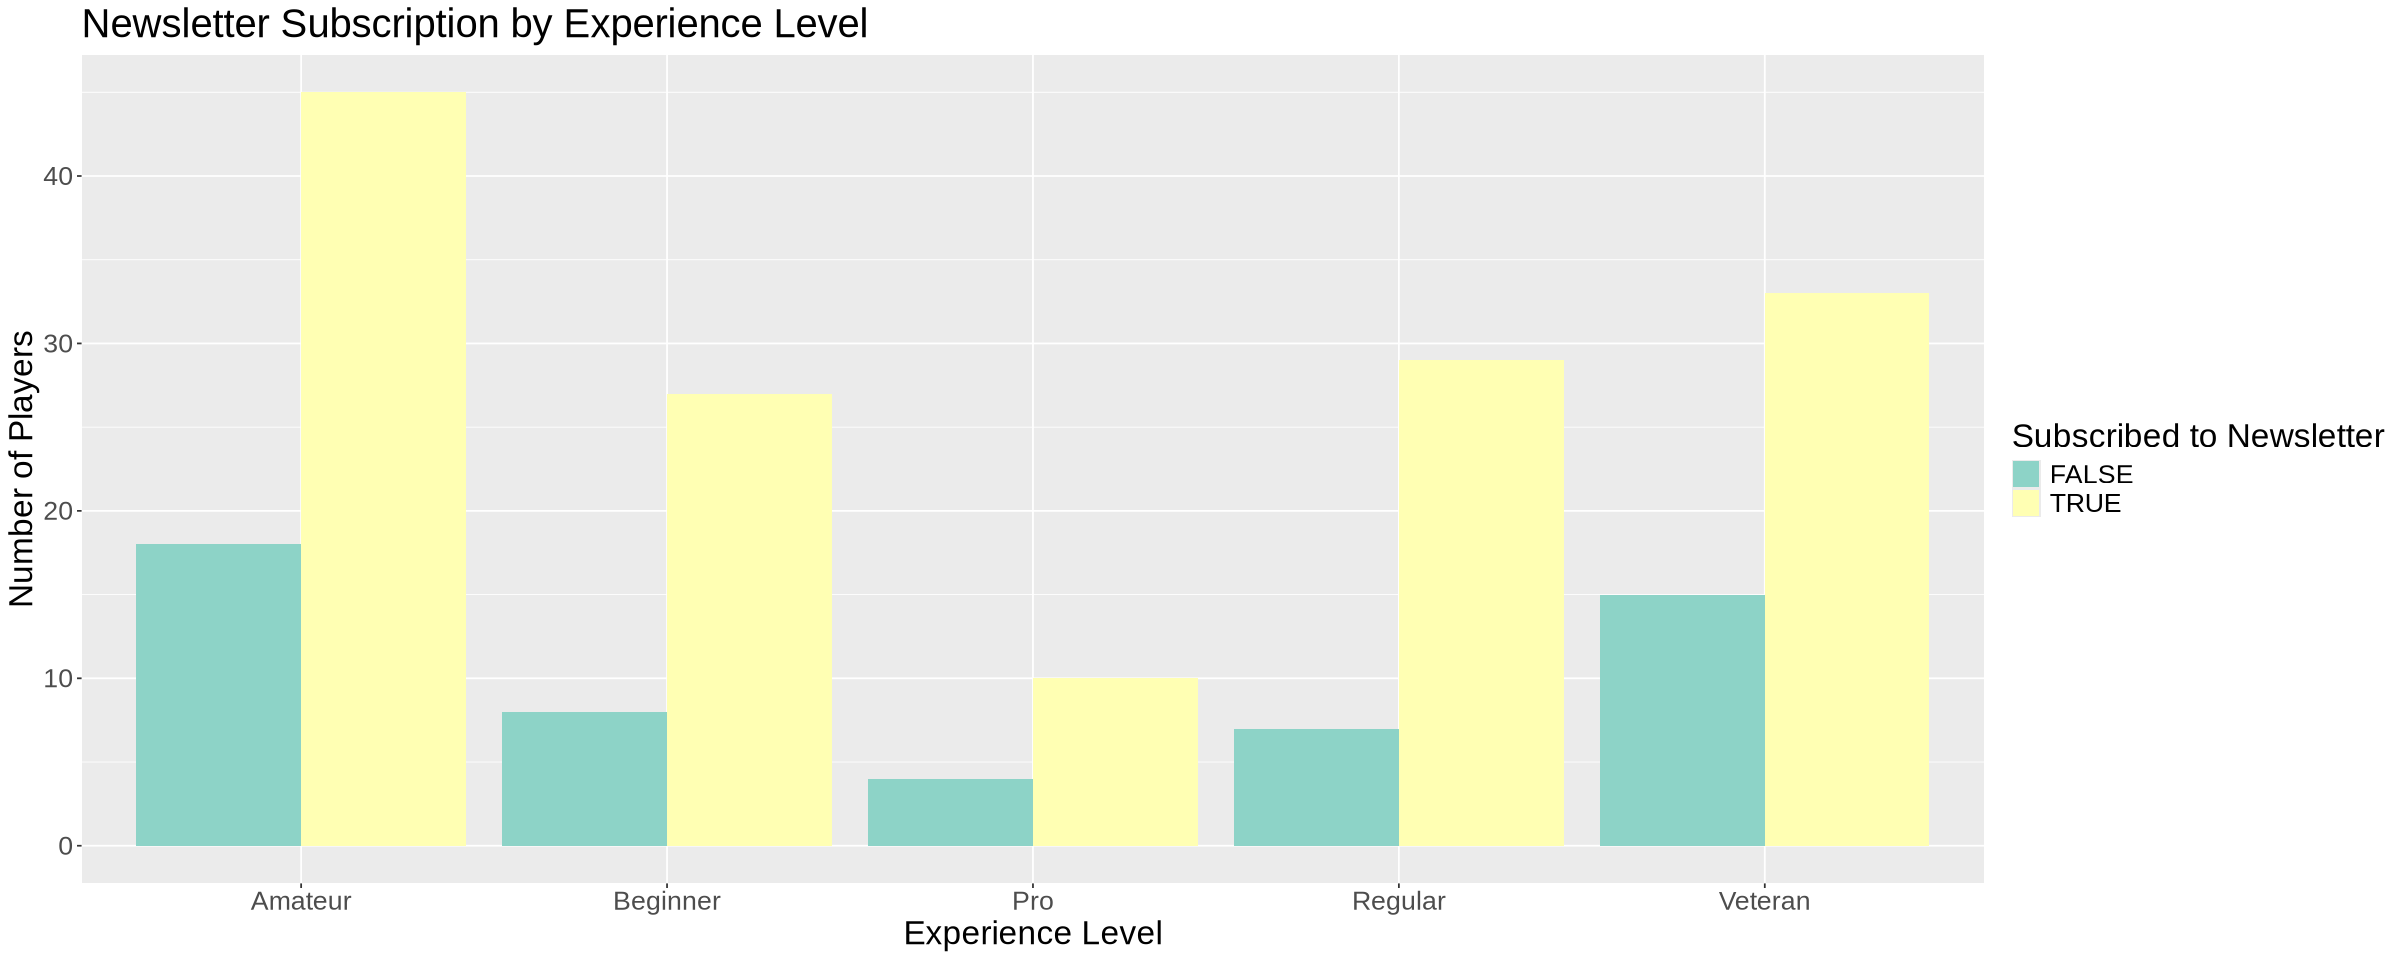

In [7]:
ggplot(players, aes(x = experience, fill = subscribe)) +
  geom_bar(position = "dodge") +
  labs(title = "Newsletter Subscription by Experience Level",
       x = "Experience Level",
       y = "Number of Players",
       fill = "Subscribed to Newsletter") +
    theme(text = element_text(size = 20)) +
    scale_fill_brewer(palette = 'Set3') 

## Methods and Plan:

I will use K-NN classification to predict whether a player will subscribe based on characteristics like experience level, total hours played, and session frequency. K-NN works well for categorical labels and doesn't assume specific data distributions, which is helpful as we have a mix of categorical and numerical predictors. However, I must standardize predictors to the same scale and remove outliers or missing values. Due to players and sessions being large data sets that contain hundreds of players and more than 1500 playing sessions, K-NN may be slow and sensitive to class imbalance, requiring over-sampling. I'll evaluate model performance using accuracy, precision, and recall, with 5-fold cross-validation to prevent overfitting. Data will be split 70% for training, 30% for testing.



